Si prega di compilare il modulo (le tue informazioni)

**Please fill in the form (your information)**


In [ ]:
# codice : Esame1-G1-C

#Nome:

#Cognome:

#Matricola:


**Domanda 1**: Carica il dataset 'California housing' in un oggetto DataFrame e visualizza (stampa) le prime 10 righe del DataFrame. Successivamente, crea un istogramma dell'attributo 'MedInc' (reddito mediano). (6 punti)
=============================================================================================================
**Question 1:** Load the 'California housing' dataset into a DataFrame object and display (print) the first 10 rows of the DataFrame. Then, create a histogram plot of the 'MedInc' (median income) attribute. (6 points)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
5    -122.25   2.697  
6 

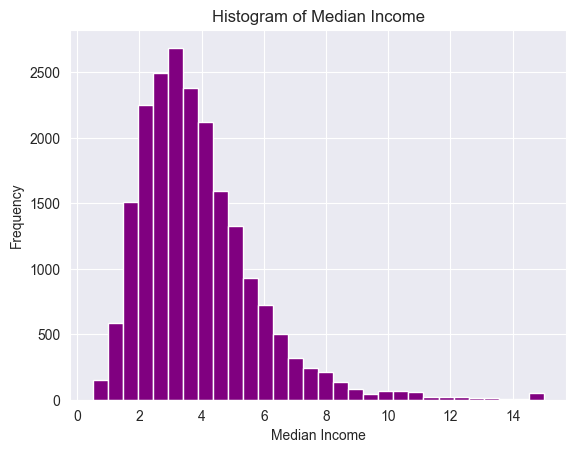

In [1]:
# libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

# load the data
california = fetch_california_housing()

# Define the dataframe
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['target'] = california.target
print(df[:10])

# histogram plot
df['MedInc'].hist(bins=30, color='purple')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Histogram of Median Income')
plt.show()


**Domanda 2**: Applicare l'algoritmo di clustering K-Means sul dataset 'California housing' per raggruppare i campioni in 3 cluster. Poi visualizza i cluster utilizzando un grafico a dispersione di 'MedInc' rispetto a 'AveOccup'. (6 punti)
============================================================================================================
**Question 2:** Apply the K-Means algorithm to the 'California housing' dataset to cluster the samples into 3 clusters. Then, visualize the resulting clusters using  a scatter plot of 'MedInc' vs 'AveOccup'. (6 points)

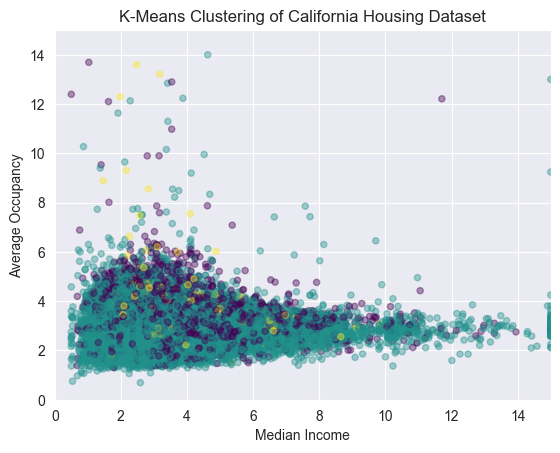

In [6]:
# libraries 
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans

# load the data
california = fetch_california_housing()

# Define the dataframe
df = pd.DataFrame(data=california.data, columns=california.feature_names)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(california.data)

# Scatter plot of MedInc vs AveOccup
plt.scatter(df['MedInc'], df['AveOccup'], c=df['Cluster'], cmap='viridis', s=20, alpha=0.4)
plt.xlabel('Median Income')
plt.ylabel('Average Occupancy')
plt.ylim(0, 15)
plt.xlim(0, 15)
plt.title('K-Means Clustering of California Housing Dataset')
plt.show()


**Domanda 3**: Addestra un classificatore ad albero decisionale sul dataset 'wine' per prevedere la classe del vino. Valuta il modello utilizzando la metrica di accuratezza e visualizza la matrice di confusione. (9 punti)
===============================================================================================================
**Question 3:** Train a decision tree classifier on the 'wine' dataset to predict the wine class. Evaluate the model using accuracy metric and display the confusion matrix. (9 points)

Accuracy: 0.9629629629629629


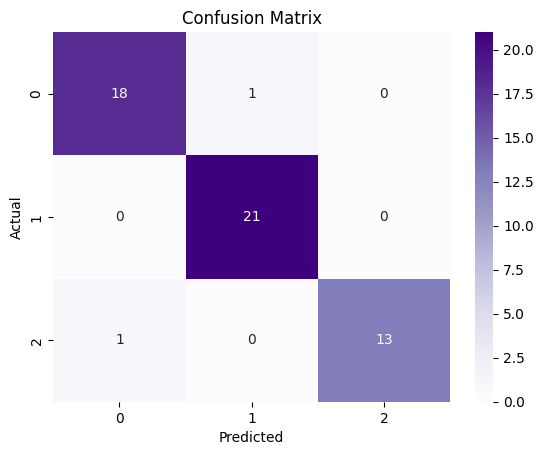

In [48]:
# libraries
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
np.random.seed(42)
# load data
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Domanda 4**: Utilizza il dataset 'breast cancer' per addestrare un classificatore random forest composto da 80 alberi decisionali per prevedere la classe target. Usare cross-validation con 5 folds per valutare il modello. (9 punti)
==============================================================================================================
**Question 4:** Use the 'breast cancer' dataset to train a random forest classifier with 80 trees to predict the target. Use cross-validation with 5 folds to evaluate the model. (9 points)

In [57]:
# libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# load data
np.random.seed(42)
breast_cancer = load_breast_cancer()

# data frame 
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target
X = df.drop('target', axis=1)
y = df['target']

model = RandomForestClassifier(n_estimators=80)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validated Accuracy: {np.mean(scores)}')


Cross-validated Accuracy: 0.9631268436578171
